# The Sparks Foundation

# Computer Vision and IOT (GRIP JULY21) Task 3 :


## Color Identification in Images

Implement an image color detector which identifies all the colors in an image or video.


### AUTHOR: ADIKA MALVIYA

In [1]:
# Import required libraries

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [2]:
# Reading an image

# Let's make a function getimage so we don't have to write a bunch of code again and again.
def getimage(filepath):
    image = cv2.imread(filepath)
    return image

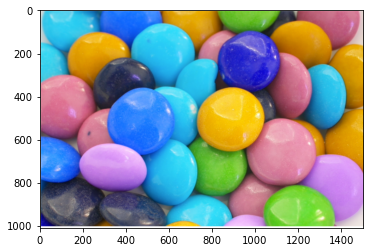

In [3]:
image = getimage("candy.jpg")
plt.imshow(image)

#### This image is quite off. This is not actually quite the image. The colours are different here. Let's update our getimage() function!

In [4]:
# Read image in RGB color space
def getimage(filepath):
    image = cv2.imread(filepath)
    # opencv reads the image in sequence blue green red (BGR), therefore we need to convert into RGB to see actual image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

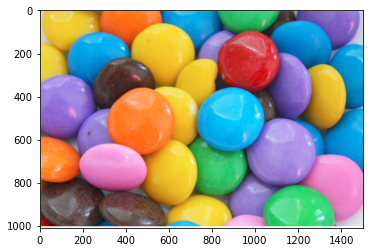

In [5]:
image = getimage("candy.jpg")
plt.imshow(image)

#### This is the actual image. But in some cases, we might want a black and white image so we can express that image as gray!

In [6]:
# Read image in Gray color space
def getgrayimage(filepath):
    image = cv2.imread(filepath)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

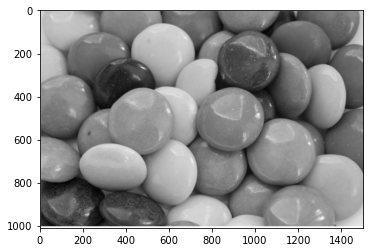

In [7]:
image = getgrayimage("candy.jpg")
plt.imshow(image,cmap='gray')

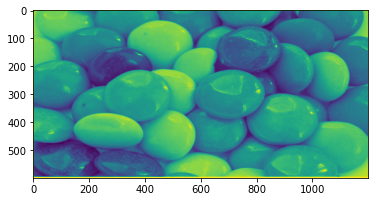

In [8]:
# Resize an image
resizedimage = cv2.resize(image, (1200, 600))
plt.imshow(resizedimage)

### Now let's move to identifying the colors from an image and displaying the top colors as pie charts.

In [9]:
# RGB To Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
# Get colors from an image
def getcolors(image, number_of_colors, show_chart):
    
 modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
 modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
 clf = KMeans(n_clusters = number_of_colors)
 labels = clf.fit_predict(modified_image)
    
 counts = Counter(labels)

 center_colors = clf.cluster_centers_
 # We get ordered colors by iterating through the keys
 ordered_colors = [center_colors[i] for i in counts.keys()]
 hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
 rgb_colors = [ordered_colors[i] for i in counts.keys()]

 if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

 return rgb_colors

[array([238.31092083, 192.21360279,  56.35604162]),
 array([ 12.81321854, 159.37632108, 220.19345775]),
 array([234.3889485 , 172.08893199, 217.61315616]),
 array([ 99.41416923,  88.29746902, 138.31081224]),
 array([219.43752179,  99.95563302,  40.73075582]),
 array([155.15018512, 127.7513436 , 210.52131852]),
 array([78.60797164, 59.80559085, 54.91824383]),
 array([ 56.7632366 , 194.67844484, 110.16349136])]

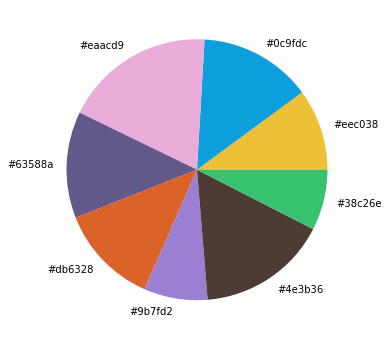

In [11]:
# Calling our function
getcolors(getimage(r'candy.jpg'), 8, True)

### Search images using colour
We'll now dive into code of filtering a set of five images based on color we'd like. For our use case, we'll supply RGB values for colours *Green*, *Blue and *Yellow and let our system filter the images.

In [12]:
# Get all images
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(getimage(os.path.join(IMAGE_DIRECTORY, file)))

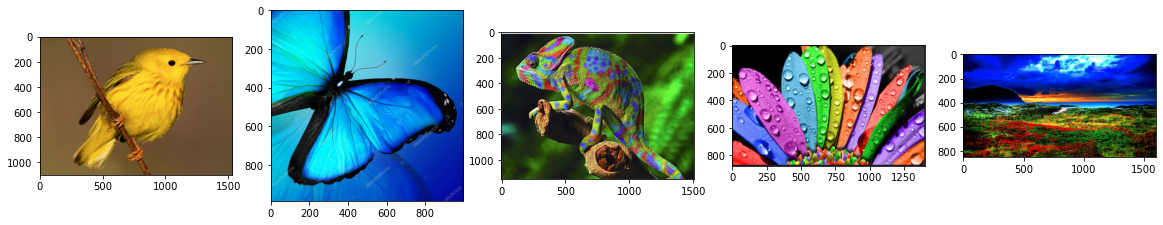

In [13]:
# Show all images
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

### Match Images with Color

In [14]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = getcolors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [15]:
# Show selected images
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## FILTER RESULTS

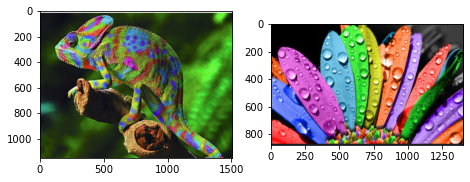

In [16]:
# Search for green
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

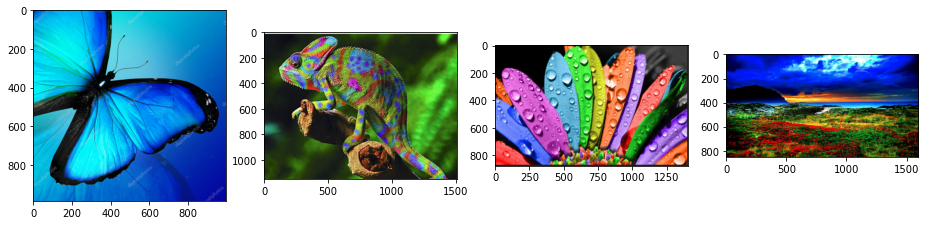

In [17]:
# Search for Blue
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

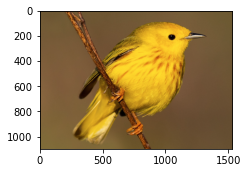

In [18]:
# Search for Yellow
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)